# Task 2 - Diffusion Maps

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from helpers.data import get_unit_cycle_dataset, get_swiss_roll_dataset, get_trajectory_dataset
from helpers.plots import (
    plot_2d_dataset,
    plot_3d_dataset,
    plot_two_pedestrians,
    plot_pairwise_eigenvector,
    plot_2d_pca_plot,
    plot_3d_pca_plot,
)
from helpers.diffusion_maps import get_diffusion_map


## 1. Similarity of diffusion maps and fourier analysis

### 1.1 Get the circular dataset and inspect it

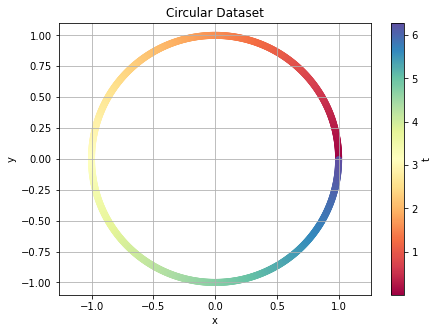

In [2]:
X_unit_cycle, t_unit_cycle, color_unit_cycle = get_unit_cycle_dataset(N=1000)  # shape (1000, 2)
_ = plot_2d_dataset(
    X_unit_cycle[:, 0],
    X_unit_cycle[:, 1],
    x_label="x",
    y_label="y",
    axis_equal=True,
    title="Circular Dataset",
    c=t_unit_cycle,
    colorbar=True,
    colorbar_label="t",
)


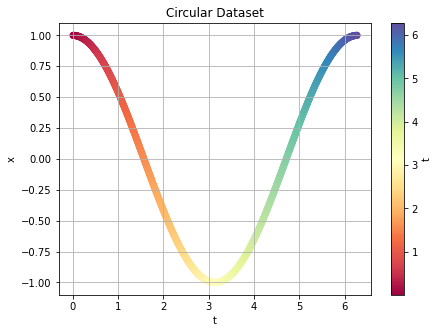

In [3]:
_ = plot_2d_dataset(
    t_unit_cycle,
    X_unit_cycle[:, 0],
    x_label="t",
    y_label="x",
    title="Circular Dataset",
    c=t_unit_cycle,
    colorbar=True,
    colorbar_label="t",
)


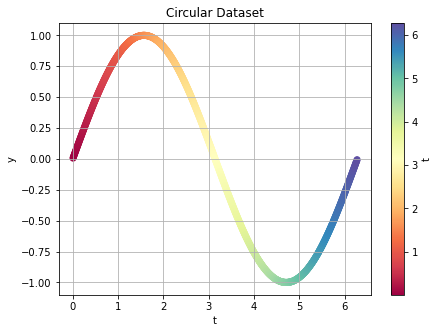

In [4]:
_ = plot_2d_dataset(
    t_unit_cycle,
    X_unit_cycle[:, 1],
    x_label="t",
    y_label="y",
    title="Circular Dataset",
    c=t_unit_cycle,
    colorbar=True,
    colorbar_label="t",
)


### 1.2 Calculate eigenvalues and eigenvectors of diffusion map

In [5]:
eig_val_circular, eig_vec_circular = get_diffusion_map(X_unit_cycle, L=4)


### 1.3 Plot eigenvectors against t

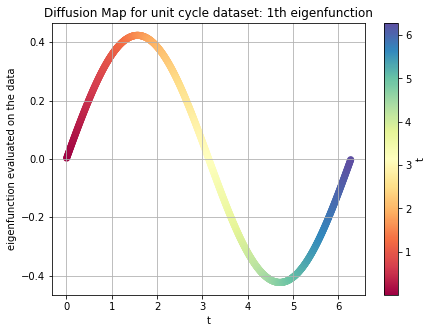

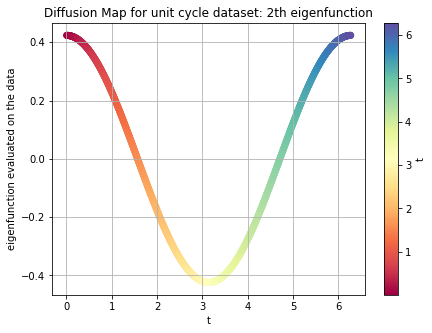

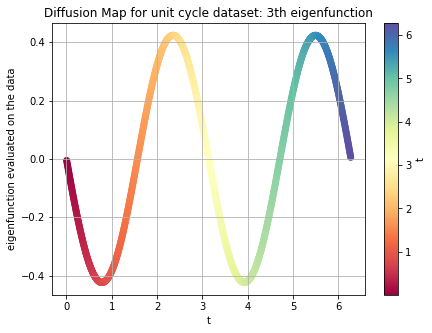

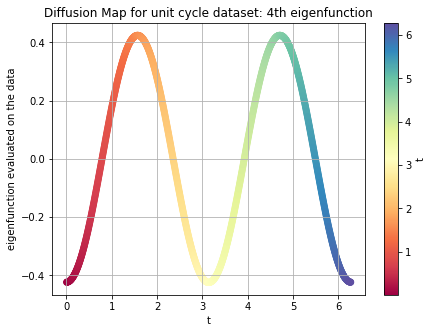

In [6]:
l_vec = list(range(1, eig_vec_circular.shape[1]))
for l in l_vec:
    fig, _ = plot_2d_dataset(
        t_unit_cycle,
        eig_vec_circular[:, l],
        x_label="t",
        y_label="eigenfunction evaluated on the data",
        title=f"Diffusion Map for unit cycle dataset: {l}th eigenfunction",
        c=t_unit_cycle,
        colorbar=True,
        colorbar_label="t",
    )


## 2. Eigenfunctions on "Swiss roll" manifold

### 2.1 Get the data and inspect it

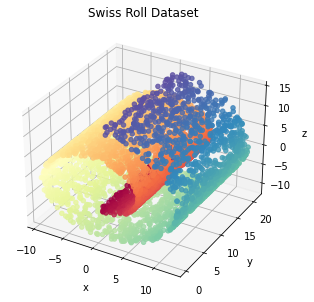

In [7]:
N = 5000
N_PLOT = 1000

X_swiss, color_swiss = get_swiss_roll_dataset(N=N)  # shape (5000, 3)

# reduce number of displayed data points for plots
idx_plot = np.random.permutation(X_swiss.shape[0])[0:N_PLOT]  # shape (1000, 3)
X_swiss_reduced = X_swiss[idx_plot, :]
color_swiss_reduced = color_swiss[idx_plot]

# show full data
fig, ax = plot_3d_dataset(
    X_swiss[:, 0],
    X_swiss[:, 1],
    X_swiss[:, 2],
    x_label="x",
    y_label="y",
    z_label="z",
    title="Swiss Roll Dataset",
    c=color_swiss,
    alpha=0.8,
)


### 2.2 Calculate eigenvalues and eigenvectors of diffusion map

In [8]:
eig_val_swiss, eig_vec_swiss = get_diffusion_map(X_swiss, L=9)  # shapes (10,); (5000, 10)


### 2.3 Plot first non-constant eigenfunction against the other ones

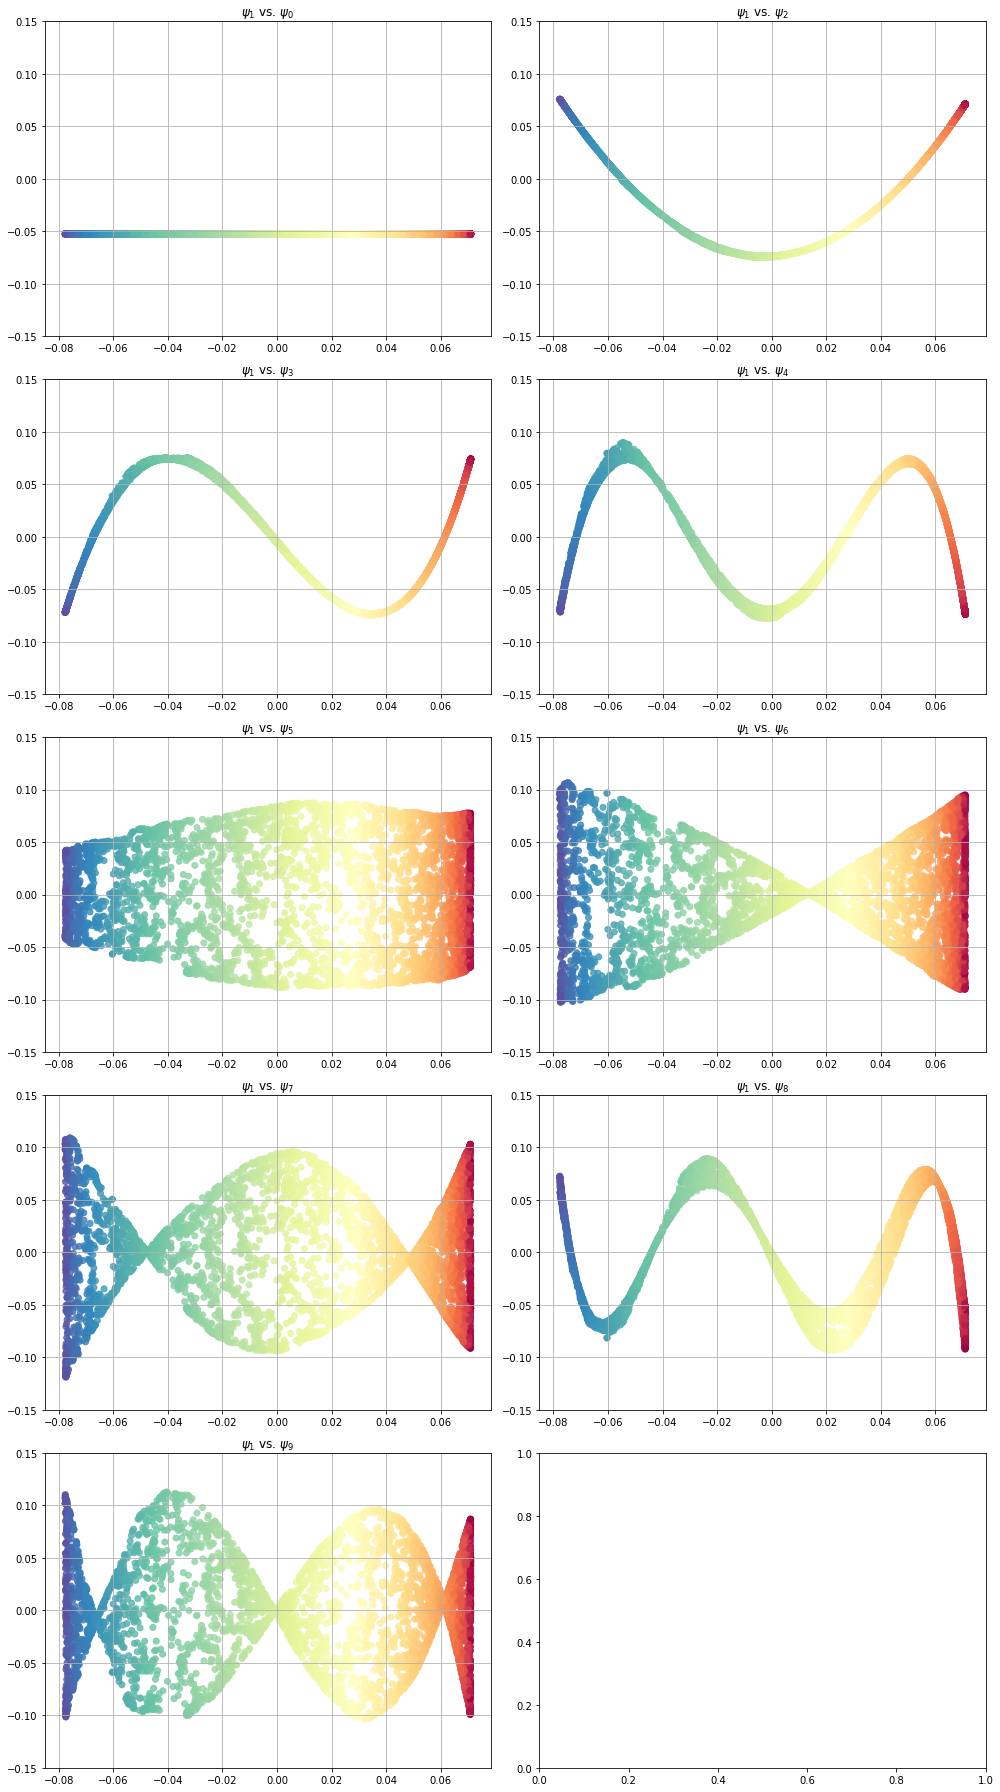

In [9]:
plot_pairwise_eigenvector(eig_vec_swiss, c=color_swiss, ylim=[-0.15, 0.15], alpha=0.8)


### 2.4 Compute first three principal components of the swiss roll dataset

In [10]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=3)
X_swiss_transformed = pca.fit_transform(X_swiss)
X_swiss_transformed_reduced = X_swiss_transformed[idx_plot, :]


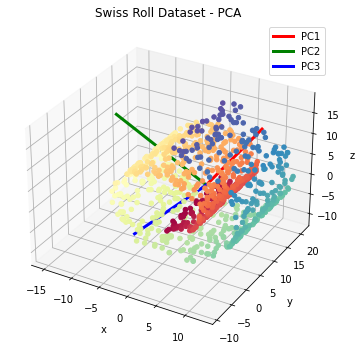

In [11]:
plot_3d_pca_plot(
    X_swiss_reduced, pca.components_, "x", "y", "z", "Swiss Roll Dataset - PCA", alpha=1, c=color_swiss_reduced
)


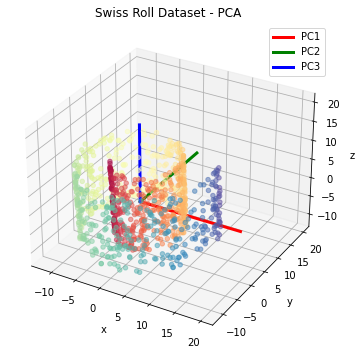

In [12]:
plot_3d_pca_plot(
    X_swiss_transformed_reduced,
    np.diag(np.ones(3)),
    "x",
    "y",
    "z",
    "Swiss Roll Dataset - PCA",
    add_mean_to_axis=False,
    alpha=0.5,
    c=color_swiss_reduced,
)


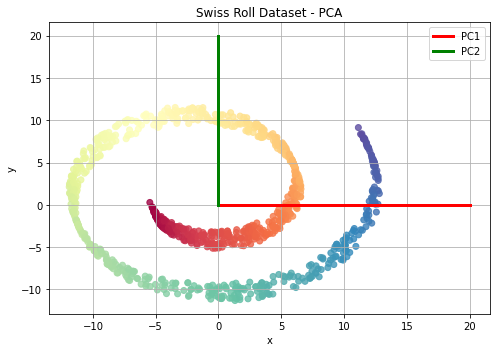

In [13]:
plot_2d_pca_plot(
    X_swiss_transformed_reduced,
    np.diag(np.ones(2)),
    "x",
    "y",
    "Swiss Roll Dataset - PCA",
    add_mean_to_axis=False,
    alpha=0.8,
    c=color_swiss_reduced,
)


## 3. Vadere trajectory data

### 3.1 Get the data and inspect it

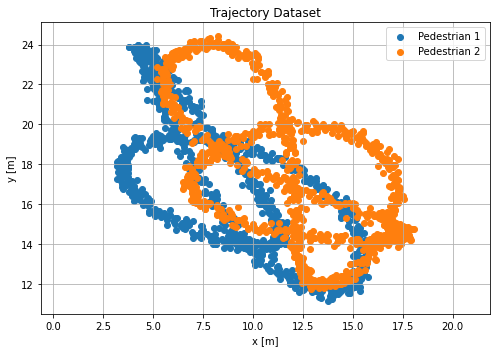

In [14]:
X_trajectory = get_trajectory_dataset()  # shape = (1000, 30)
plot_two_pedestrians(X_trajectory, x_label="x [m]", y_label="y [m]", title="Trajectory Dataset")


In [15]:
eig_val_traj, eig_vec_traj = get_diffusion_map(X_trajectory, L=10)


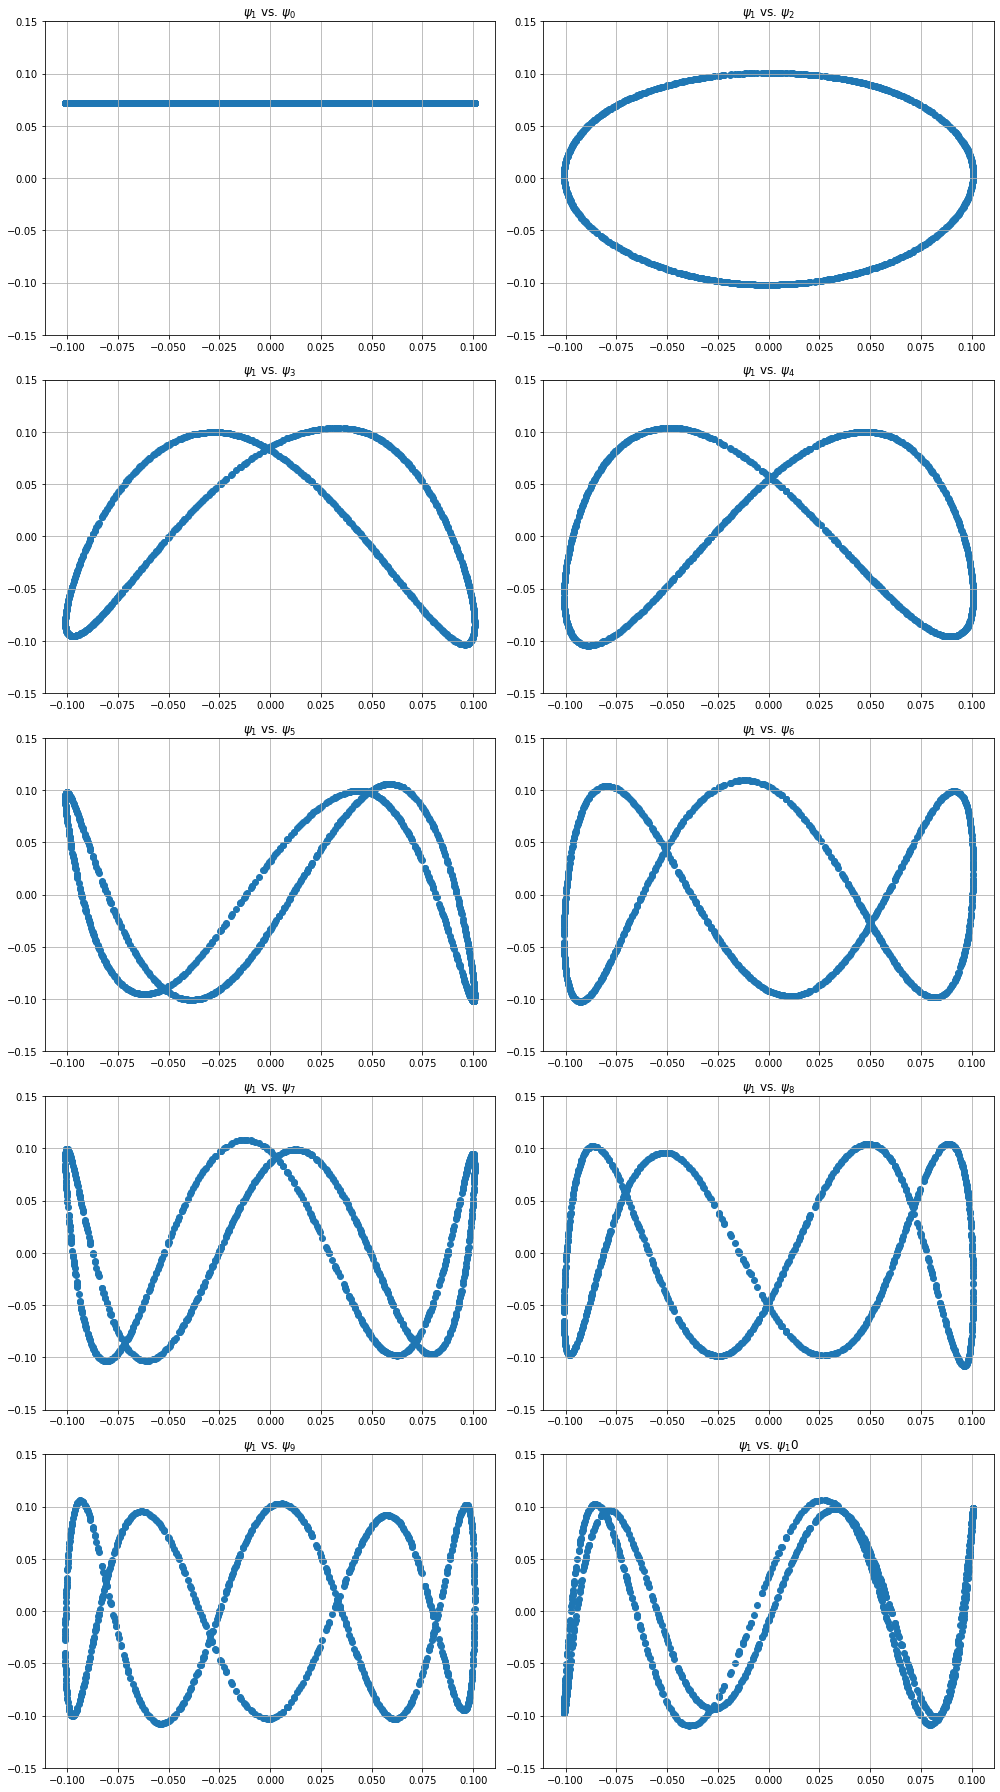

In [16]:
plot_pairwise_eigenvector(eig_vec_traj, ylim=[-0.15, 0.15])


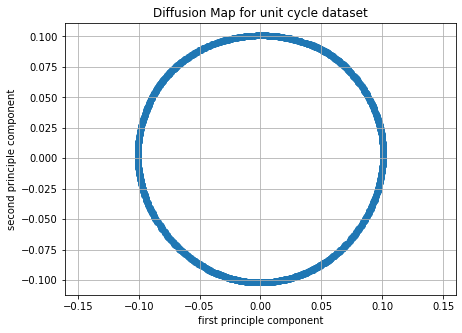

In [17]:
_ = plot_2d_dataset(
    eig_vec_traj[:, 1],
    eig_vec_traj[:, 2],
    axis_equal=True,
    x_label="first principle component",
    y_label="second principle component",
    title="Diffusion Map for unit cycle dataset",
)


## 4. Bonus: Datafold

Example adapted from https://datafold-dev.gitlab.io/datafold/tutorial_03_basic_dmap_scurve.html

In [18]:
import datafold.dynfold as dfold
import datafold.pcfold as pfold
from datafold.utils.plot import plot_pairwise_eigenvector as plot_pairwise_eigenvector_dfold
import matplotlib.pyplot as plt
import numpy as np


In [19]:
N = 5000
X_swiss_datafold, color_swiss_datafold = get_swiss_roll_dataset(N=N)

nr_samples_plot = 1000
idx_plot = np.random.permutation(N)[0:nr_samples_plot]


In [20]:
X_pcm = pfold.PCManifold(X_swiss_datafold)
X_pcm.optimize_parameters()


(3.288530461623228, 0.5870810502252655)

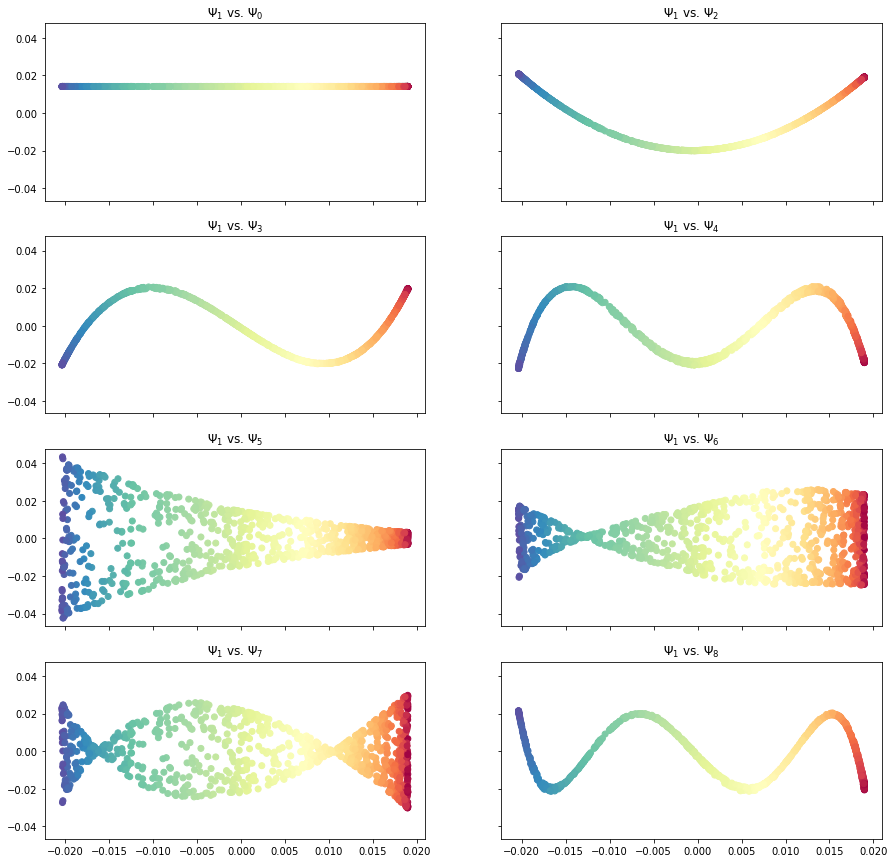

In [21]:
dmap = dfold.DiffusionMaps(
    kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon),
    n_eigenpairs=9,
    dist_kwargs=dict(cut_off=X_pcm.cut_off),
)
dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

plot_pairwise_eigenvector_dfold(
    eigenvectors=dmap.eigenvectors_[idx_plot, :],
    n=1,
    fig_params=dict(figsize=[15, 15]),
    scatter_params=dict(cmap=plt.cm.Spectral, c=color_swiss_datafold[idx_plot]),
)
